In [1]:
import numpy as np
import xarray as xr
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation, test_gaussian
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

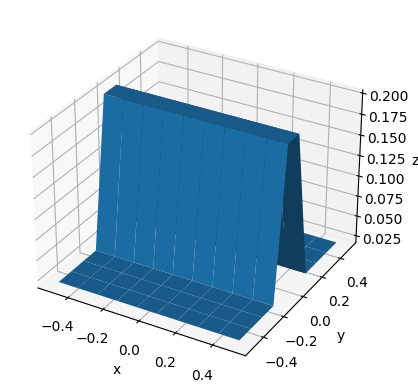

In [2]:
n_grid = 100
n_time = 500
dt = 0.0001
dx = 0.01
dy = 0.01

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition = 1*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
sources =  1*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100
diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')



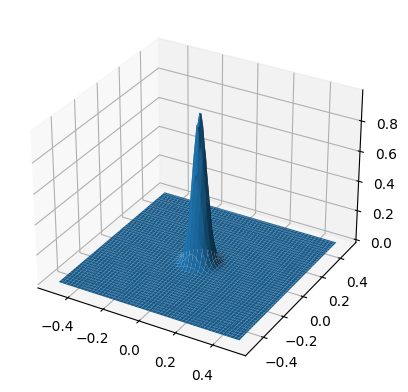

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [4]:
result_ds = forward_euler_final(conc, diffusion, initial_condition, sources)
result_ds

<xarray.Dataset> Size: 40MB
Dimensions:        (x: 100, y: 100, t: 500)
Coordinates:
  * x              (x) float64 800B -0.5 -0.4899 -0.4798 ... 0.4798 0.4899 0.5
  * y              (y) float64 800B -0.5 -0.4899 -0.4798 ... 0.4798 0.4899 0.5
  * t              (t) float64 4kB 0.0 0.0001002 0.0002004 ... 0.0499 0.05
Data variables:
    concentration  (x, y, t) float64 40MB 1.384e-87 0.0 0.0 0.0 ... 0.0 0.0 0.0
    diffusion      (x, y) float64 80kB 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    sources        (x, y) float64 80kB 1.384e-87 7.553e-86 ... 1.384e-87
Attributes:
    dx:        0.010101010101010102
    dy:        0.010101010101010102
    dt:        0.0001002004008016032
    n_grid:    100
    n_time:    500
    metadata:  Generated by forward_euler_final

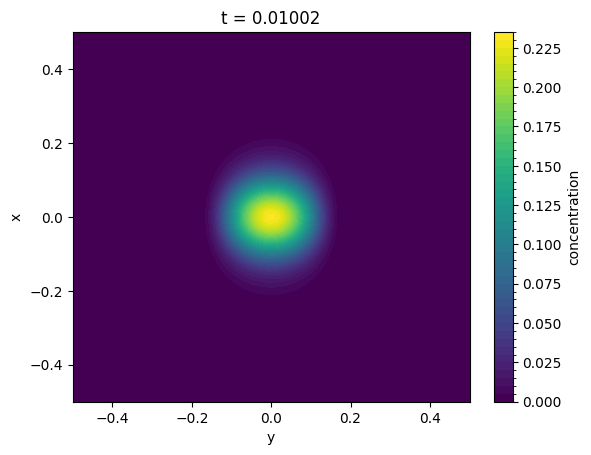

In [5]:
xr.plot.contourf(result_ds['concentration'].isel(t=100), levels=50)


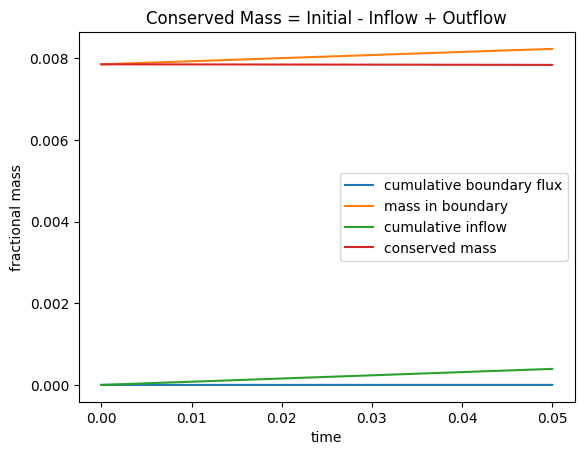

In [6]:
fig, ax = plot_mass_conservation(result_ds)

In [7]:
diff = test_gaussian(forward_euler_final)

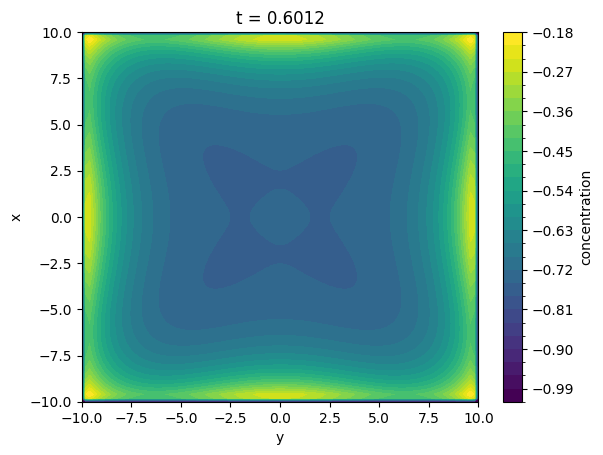

In [27]:
xr.plot.contourf(diff.isel(t=100), levels=30)

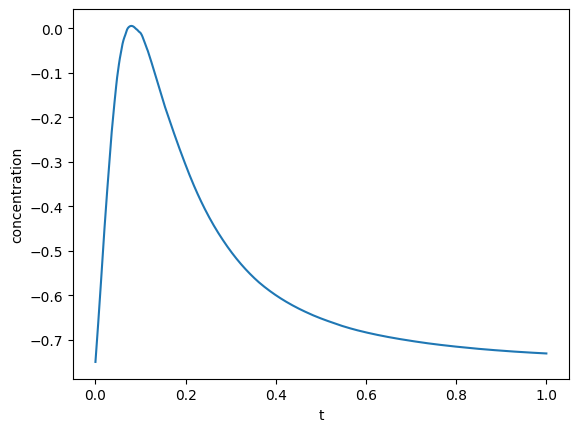

In [9]:
diff.median(dim=('x','y')).plot()

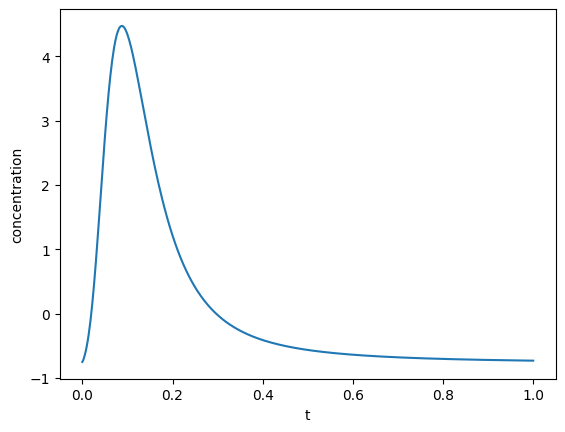

In [10]:
diff.mean(dim=('x','y')).plot()

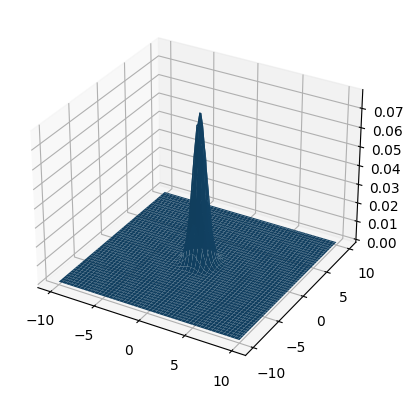

In [11]:
xrange = (-10, 10)
yrange = (-10, 10)
trange=(0, 1)
n_grid = 100
n_time = 500
conc = Quantity2D(
    n_grid,
    n_time,
    xrange,
    yrange,
    trange,
)
xcoords = conc.xcoords
ycoords = conc.ycoords
tcoords = conc.tcoords
X, Y = np.meshgrid(xcoords, ycoords, indexing='ij')
initial_condition =  (1/(4*np.pi))*np.exp(- (X**2 + Y**2)/1)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)